In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import random
import copy

import sys
sys.path.append("Fall 2024")

import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs
import discretize as disc

# Z PDF testing

F_delta(0) = 0.995335454169364
0.9916917610418439
F_delta(0) = 0.9639025644010819
0.9807088961656546
F_delta(0) = 0.9144436340118154
0.9625763128345364
F_delta(0) = 0.8570175447991644
0.9404751195813686
F_delta(0) = 0.7977849008850921
0.9165712486912919


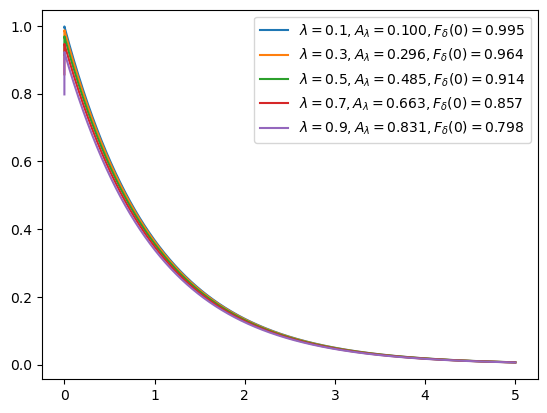

In [6]:
import scipy.integrate
for lam in [0.1,0.3,0.5,0.7,0.9]:
    xs, pdf_values, A_lam = zs.compute_z_pdf_exp(lam, 100000, high=5)
    plt.plot(xs, pdf_values, label=f'$\\lambda={lam}, A_\\lambda = {A_lam:.3f}, F_\\delta(0)={(1+A_lam) * math.exp(-A_lam):.3f}$')
    print(scipy.integrate.simpson(pdf_values, x=xs))
plt.legend()